# Team

- Adrian Carmona
- Ulises pat
- Isaac Chavez

# L2.2 Diffusion of Innovations

The Bass Model developed by Frank Bass (1969) describes the process of diffusion of innovations. It is a classical mathematical model in marketing literature.

Consider that $A(t)$ denotes the total population that adopted an innovation until time $t$- The total of potential adopters is denoted as $P$. According to this model, the adoption rate at which the number of adopters changes throughout time depends on how innovative is the product being adopted.

$$
\frac{dA(t)}{dt} = i(t) [P-A(t)]
$$

where $i(t)$ denotes the coefficient of diffusion, which describes the innovativeness of the product being adopted. There are various methods of defining the diffusion coefficient. In particular, the following three models for computing $i(t)$ are going to be considered:
* External-Influence Model
$$
i(t) = \alpha
$$

* Internal-Influence Model
$$
i(t) = \beta A(t)
$$

* Mixed-Influence Model
$$
i(t) = \alpha + \beta A(t)
$$
where $\alpha$ is the external-influence factor and $\beta$ is the internal-influence factor or imitation factor.

## 1. Solving Ordinary Differential Equations

An equation which contains the derivate(s) of a yet to be determined function $y(x)$ is called an ordinary differential equation (ODE).

The SciPy Library [[1](https://docs.scipy.org/doc/scipy/reference/integrate.html)] includes different methods to solves ODE's in python: ```ode``` and ```odeint```.

## 1.1 Newton's Law of Cooling

The Newton's Law of Cooling states that the rate of change of temperature T is proportional to temperature difference with the enviroment ($T_{amb}$). An extensive description of this phenomena can be found here [[2](https://www.khanacademy.org/math/differential-equations/first-order-differential-equations/exponential-models-diff-eq/v/newtons-law-of-cooling)].
$$
\frac{dT}{dt} = - k (T-T_{amb})
$$

where k is the cooling coefficient. 
The ```odeint``` method can be used this ODE. ```odeint``` requires three inputs:
```python
scipy.integrate.odeint(func, y0, t)
                       
```
* func: Function that return derivative values at y and t.
* y0: Initial conditions on y.
* t: A sequence of time points for which to solve for y.

Consider a cup of coffee at 95 $^\circ$C in a room where the temperature is 20 $^\circ$C. If the cooling coefficient is $k = 1/50$ min$^{-1}$.

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def fun(T, t, k, Tamb):
    dTdt = - k * (T - Tamb)
    return dTdt

In [3]:
T0 = 95
k = 1/50
Tamb = 20
t = np.linspace(0,60)

In [4]:
T = odeint(fun, T0, t, args = (k, Tamb))

The analytical solution of the problem can be obtained by direct integration:
$$
T(t) = (T(0) - T_{amb}) e^{-kt} + T_{amb}
$$

In [5]:
def yAnalytical(T0, Tamb, k, t):
    return (T0-Tamb)*np.exp(-k*t)+Tamb

The numerical and the analytical solution are presented in the following plot.

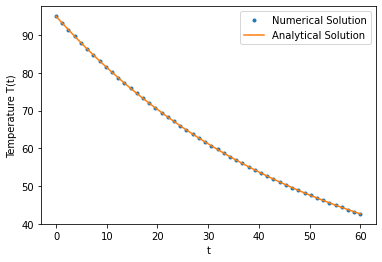

In [6]:
plt.plot(t, T, '.', label = 'Numerical Solution')
plt.plot(t, yAnalytical(T0, Tamb, k, t), '-', label = 'Analytical Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('Temperature T(t)')
plt.show()

## 1.2 External-Influence Model

In the external-influence model, the adoption coefficeint only depends on an external factor. One example of external influence in social media is when important news goes viral.

The external-influence model can be formulated as,
$$
\frac{dA(t)}{dt} = \alpha[P-A(t)]
$$

The analytical solution when A(0) = 0 is:
$$
A(t) = P(1-e^{-\alpha t})
$$

Considering a population P = 100 and $\alpha$ = 0.01, obtain the cumulative population over the time (numerical and analytical solution).

In [17]:
def func(P, t, A, alpha):
    dAdt = alpha * (P - A)
    return dAdt

In [18]:
A0 = 0
P = 100
alpha = 0.01
t = np.linspace(0,300)

In [19]:
A = odeint(func, A0, t, args = (P, alpha))

In [20]:
def yAnalytical(A0, P, t, alpha):
    sol = P * (1 - np.exp(-alpha*t))
    return sol

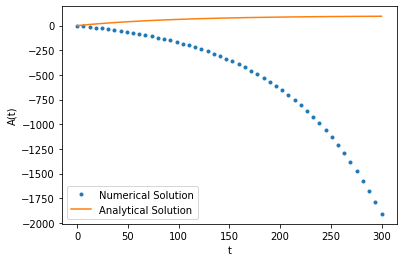

In [21]:
plt.plot(t, A, '.', label = 'Numerical Solution')
plt.plot(t, yAnalytical(A0, P, t, alpha), '-', label = 'Analytical Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('A(t)')
plt.show()

## Internal-Influence Model

In the internal-influence model, adoption depends on how many have adopted the innovation in the current time step. The internal model can be described as follows:
$$
\frac{dA(t)}{dt} = \beta A(t) [P - A(t)]
$$
This model is called a pure imitation model because the diffusion rate depends only on $\beta A(t)$.

The analytical solution of the model is:
$$
A(t) = \frac{P}{1+\frac{P-A_0}{A_0}e^{-\beta P(t-t0)}}
$$
where $A(t_0) = A_0$,

Considering a population P = 200, $\beta = 10^{-5}$ and $A_0 = 30$, obtain the cumulative population over the time (numerical and analytical solution).

In [22]:
def func(P, t, A, beta):
    dAdt = beta * A * (P - A)
    return dAdt

In [23]:
A0 = 30
P = 200
beta = 0.00005
t = np.linspace(0,3000)

In [24]:
A = odeint(func, A0, t, args = (P, beta))

In [25]:
def yAnalytical(A0, P, t, beta):
    sol = P / (1 - ((P-A0)/A0)*np.exp(-beta*t))
    return sol

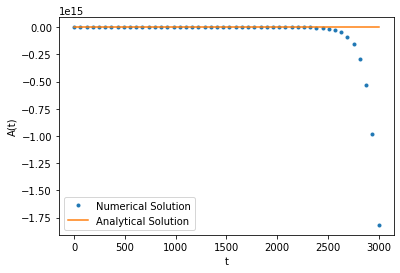

In [26]:
plt.plot(t, A, '.', label = 'Numerical Solution')
plt.plot(t, yAnalytical(A0, P, t, alpha), '-', label = 'Analytical Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('A(t)')
plt.show()

## Mixed-Influence Model

The mixed-influence model is situated in between the internal- and external-influece models. The mixed-influence model can be described as follows:
$$
\frac{dA(t)}{dt} = (\alpha + \beta A(t)) [P - A(t)]
$$
This model is called a pure imitation model because the diffusion rate depends only on $\beta A(t)$.

The analytical solution of the model is:
$$
A(t) = \frac{P - \frac{\alpha(P-A_0)}{\alpha + \beta A_0} e^{-(\alpha + \beta P)(t-t_0)}}{1 + \frac{\beta(P-A_0)}{\alpha + \beta A_0} e^{-(\alpha + \beta P)(t-t_0)}}
$$
where $A(t_0) = A_0$,

Considering a population P = 200, $\alpha = 10^{-3}$, $\beta = 10^{-5}$ and $A_0 = 30$, the cumulative population over the time can be obtained as follows (numerical and analytical solution).

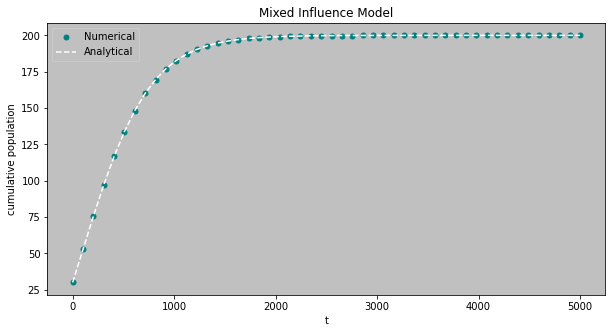

In [67]:
#function 1
def model(A,t,alpha, beta, P):
    return (alpha + beta*A) * (P - A)

#analytical solution
def yAnalytical(P,alpha, beta, A0,t):
    numerador = (P - ((alpha*(P-A0)) / ((alpha+beta*A0)))* np.exp(-(alpha+beta*P)* (t))) 
    denominador = (1 + ((beta*(P-A0)) / ((alpha+beta*A0)))* np.exp(-(alpha+beta*P)* (t)))
    return numerador / denominador

#hyper parameters
P = 200
alpha = 10**-3
beta = 10**-5
A0 = 30
t = np.linspace(0,5000)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['axes.facecolor'] = 'silver'
plt.plot(t, odeint(model, A0, t, args = (alpha, beta, P)), 'o', color = 'teal',label = 'Numerical',markersize=5)
plt.plot(t,  yAnalytical(P,alpha, beta, A0,t), '--', color = 'white',label = 'Analytical',markersize=10)
plt.title("Mixed Influence Model")
plt.xlabel('t')
plt.ylabel('cumulative population')
plt.legend()
plt.show()

## References

This notebook is based on:

[1]  Reza Zafarani, Mohammad Ali Abbasi, Huan Liu (2014) Social Media Mining: An Introduction. UK.